In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Finance Expenses Data.xlsx - Data.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df['Debit'].fillna(0, inplace=True)
df['Credit'].fillna(0, inplace=True)

# Display dataset summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account        563 non-null    object        
 1   Date           563 non-null    datetime64[ns]
 2   Description    563 non-null    object        
 3   Debit          563 non-null    float64       
 4   Credit         563 non-null    float64       
 5   Amount         563 non-null    float64       
 6   Sub-category   563 non-null    object        
 7   Category       563 non-null    object        
 8   Category Type  563 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 39.7+ KB
None


C:\Users\HP\AppData\Local\Temp\ipykernel_27380\3787058974.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Debit'].fillna(0, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27380\3787058974.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [6]:
df.shape

(563, 9)

In [8]:
df.isnull( )

,Account,Date,Description,Debit,Credit,Amount,Sub-category,Category,Category Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
558,False,False,False,False,False,False,False,False,False
559,False,False,False,False,False,False,False,False,False
560,False,False,False,False,False,False,False,False,False
561,False,False,False,False,False,False,False,False,False


In [10]:
# Try reading the file to inspect its structure    # Display basic info and first few rows
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account        563 non-null    object        
 1   Date           563 non-null    datetime64[ns]
 2   Description    563 non-null    object        
 3   Debit          563 non-null    float64       
 4   Credit         563 non-null    float64       
 5   Amount         563 non-null    float64       
 6   Sub-category   563 non-null    object        
 7   Category       563 non-null    object        
 8   Category Type  563 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 39.7+ KB


In [12]:
df.head

<bound method NDFrame.head of       Account       Date    Description  Debit  Credit  Amount   Sub-category  \
0    Checking 2021-01-04   ACME Pty Ltd    0.0  4000.0  4000.0         Salary   
1      Credit 2021-01-04         Ground    5.0     0.0    -5.0         Coffee   
2    Checking 2021-01-05    Estate Mgt.  900.0     0.0  -900.0           Rent   
3    Checking 2021-01-05    Finance Co.  150.0     0.0  -150.0  Entertainment   
4      Credit 2021-01-05         Ground    5.0     0.0    -5.0         Coffee   
..        ...        ...            ...    ...     ...     ...            ...   
558    Credit 2021-12-27         Ground    5.0     0.0    -5.0         Coffee   
559  Checking 2021-12-28      Phone Co.   40.0     0.0   -40.0          Phone   
560    Credit 2021-12-29  Streaming Co.   35.0     0.0   -35.0  Entertainment   
561    Credit 2021-12-30         Ground    5.0     0.0    -5.0         Coffee   
562    Credit 2021-12-31         Ground    5.0     0.0    -5.0         Coffee  

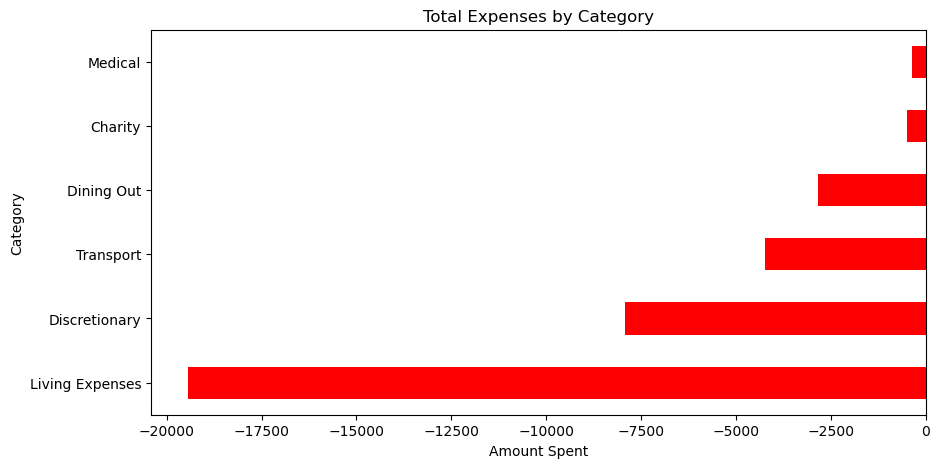

In [14]:
# Aggregate total expenses per category
expense_by_category = df[df['Category Type'] == 'Expense'].groupby('Category')['Amount'].sum()

# Plot top expenses
plt.figure(figsize=(10,5))
expense_by_category.sort_values().plot(kind='barh', color='red')
plt.title("Total Expenses by Category")
plt.xlabel("Amount Spent")
plt.ylabel("Category")
plt.show()


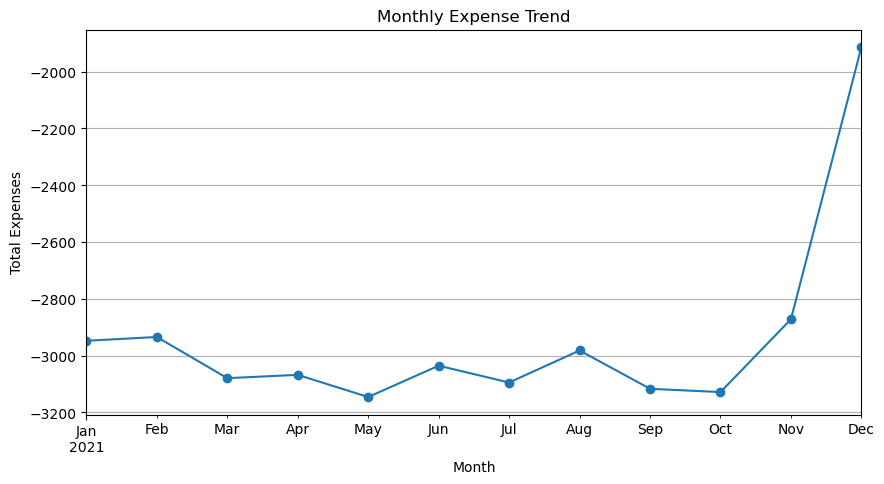

In [16]:
df['Month'] = df['Date'].dt.to_period('M')

# Aggregate expenses per month
monthly_expenses = df[df['Category Type'] == 'Expense'].groupby('Month')['Amount'].sum()

# Plot trend
plt.figure(figsize=(10,5))
monthly_expenses.plot(marker='o', linestyle='-')
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expenses")
plt.grid(True)
plt.show()


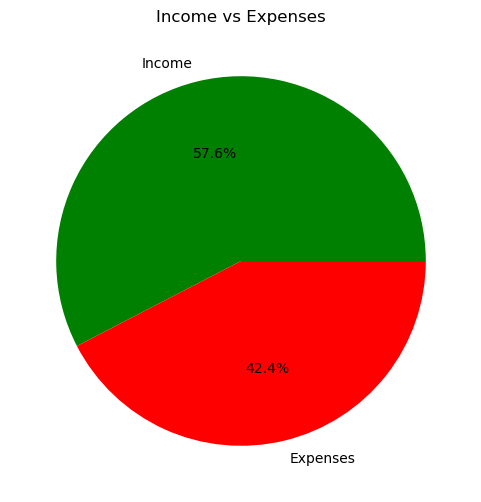

In [18]:
# Aggregate total income and expenses
income = df[df['Category Type'] == 'Income']['Amount'].sum()
expenses = df[df['Category Type'] == 'Expense']['Amount'].sum()

# Plot
plt.figure(figsize=(6,6))
plt.pie([income, abs(expenses)], labels=['Income', 'Expenses'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Income vs Expenses")
plt.show()
